# <center><b>Classifier: </b> Churn Dataset under the CRISP-DM Framework</center>

---

# 1. Business Requirements

- Mục tiêu: Dự đoán khách hàng có rời bỏ dịch vụ (Churn) hay không
- Ý nghĩa: Giúp doanh nghiệp giữ chân được khách hàng, cải thiện chiến lược kinh doanh, ...
- Dữ liệu: https://www.kaggle.com/datasets/blastchar/telco-customer-churn (Kaggle)
- Target variable: Churn (0: No, 1: Yes)

---

---

# 2. Data Understanding

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
df = pd.read_csv('../data/Telecom_Customer_Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [117]:
print(f"Dataset size: {df.shape}\n")    # Kích thước của dữ liệu
df.info()

Dataset size: (7043, 21)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling

In [118]:
df.describe()   # Thống kê các thuộc tính dạng numeric

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


---

### 2.1. **Column Information**




* **tenure**: Tổng số tháng sử dụng dịch vụ.
* **PhoneService**: Có đăng ký dịch vụ điện thoại hay không.
* **MultipleLines**: Có nhiều đường dây điện thoại.
* **InternetService**: Loại hình Internet (`DSL`, `Fiber optic`, `No`).
* **OnlineSecurity**: Dịch vụ bảo mật trực tuyến.
* **OnlineBackup**: Dịch vụ sao lưu trực tuyến.
* **DeviceProtection**: Gói bảo vệ thiết bị.
* **TechSupport**: Hỗ trợ kỹ thuật.
* **StreamingTV**: Dịch vụ xem TV trực tuyến.
* **StreamingMovies**: Dịch vụ xem phim trực tuyến.
* **Contract**: Loại hợp đồng khách hàng đang sử dụng.
* **PaperlessBilling**: Hóa đơn điện tử.
* **PaymentMethod**: Phương thức thanh toán.
* **MonthlyCharges**: Chi phí hàng tháng.
* **TotalCharges**: Tổng chi tiêu tích lũy.
* **Churn** *(Label)*: Khách hàng rời bỏ dịch vụ.

---

### 2.2 EDA

In [119]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df_numeric = df.select_dtypes(include=['number'])   # df chứa các cột số 
df_obj = df.select_dtypes(include=['object'])   # df chứa các kiểu str

In [120]:
for col in df_obj.columns:
    print(f"{col}:\n{df[col].unique()}\n")

customerID:
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender:
['Female' 'Male']

Partner:
['Yes' 'No']

Dependents:
['No' 'Yes']

PhoneService:
['No' 'Yes']

MultipleLines:
['No phone service' 'No' 'Yes']

InternetService:
['DSL' 'Fiber optic' 'No']

OnlineSecurity:
['No' 'Yes' 'No internet service']

OnlineBackup:
['Yes' 'No' 'No internet service']

DeviceProtection:
['No' 'Yes' 'No internet service']

TechSupport:
['No' 'Yes' 'No internet service']

StreamingTV:
['No' 'Yes' 'No internet service']

StreamingMovies:
['No' 'Yes' 'No internet service']

Contract:
['Month-to-month' 'One year' 'Two year']

PaperlessBilling:
['Yes' 'No']

PaymentMethod:
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Churn:
['No' 'Yes']



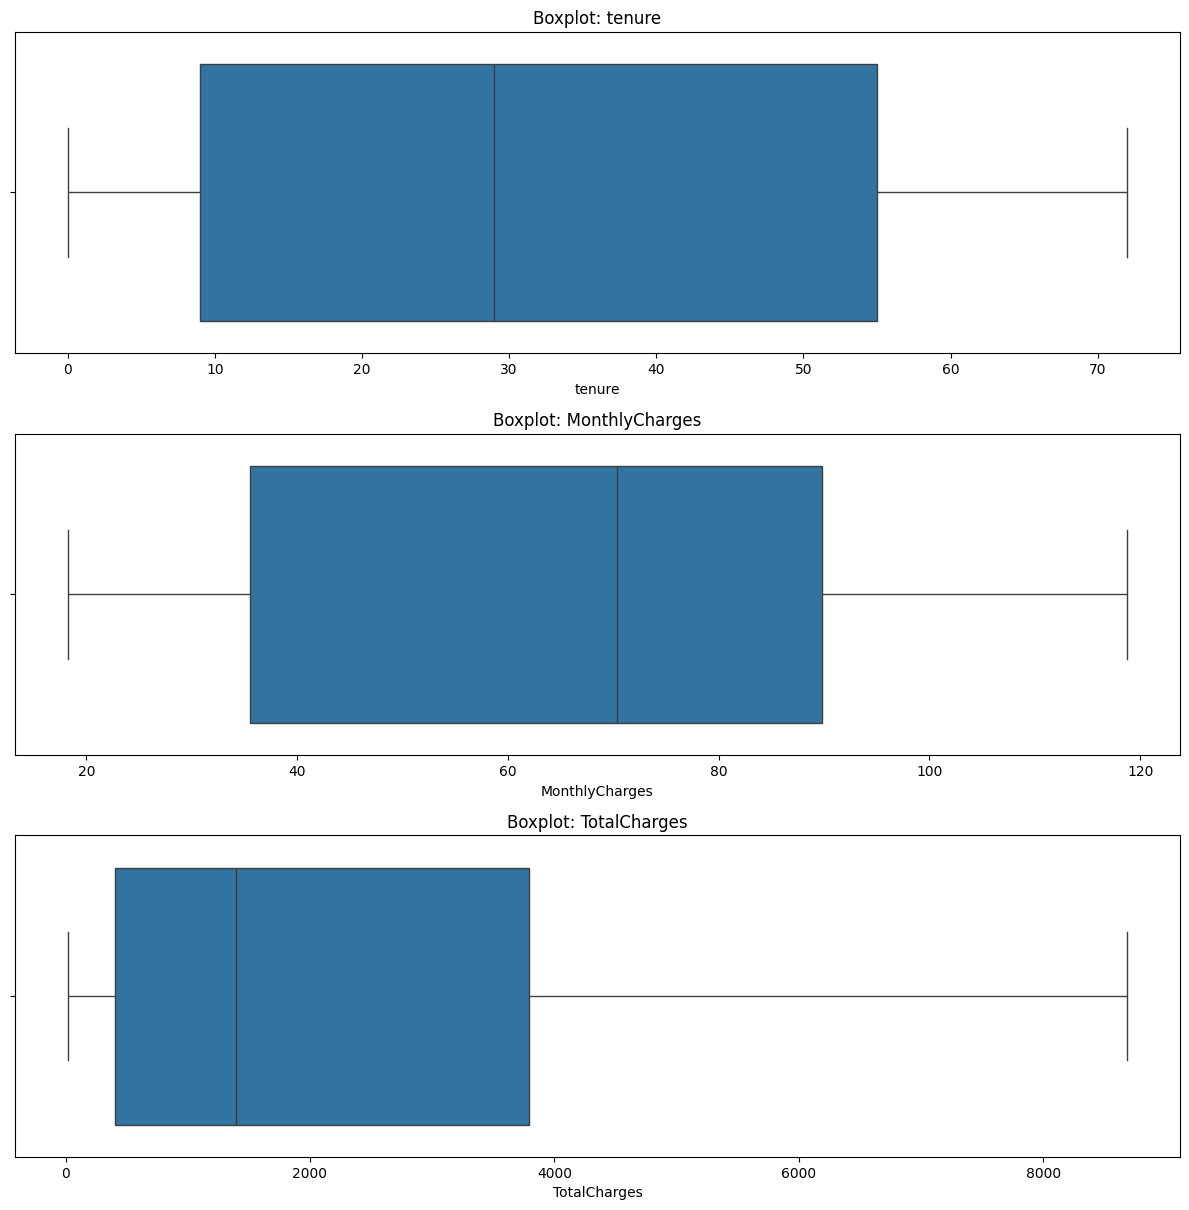

In [121]:
# số lượng cột số
num_cols = df_numeric.shape[1]

# thiết lập figure
plt.figure(figsize=(12, 4 * num_cols))

for i, col in enumerate(df_numeric.columns, 1):
    if col == 'SeniorCitizen':
        continue
    
    plt.subplot(num_cols, 1, i)          
    sns.boxplot(x=df_numeric[col])
    plt.title(f"Boxplot: {col}")
    plt.tight_layout()

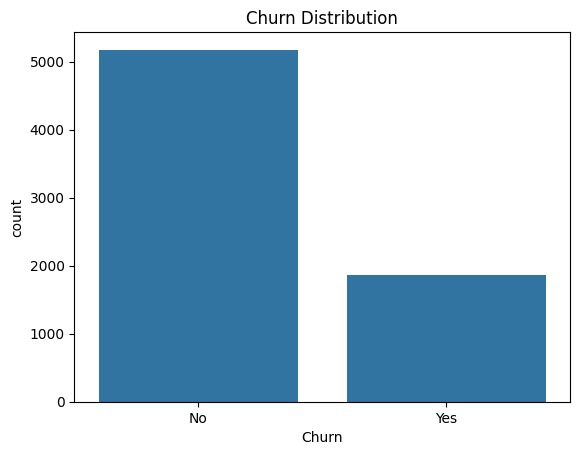

In [122]:
import seaborn as sns
sns.countplot(x=df["Churn"])
plt.title("Churn Distribution")
plt.show()

Text(0.5, 1.0, 'Tenure vs MonthlyCharges by Churn')

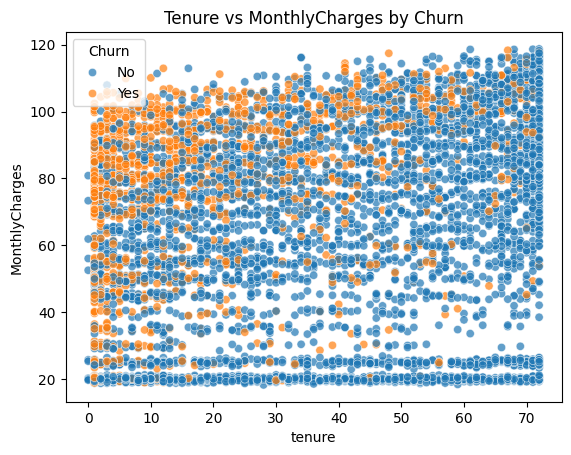

In [123]:
sns.scatterplot(
    data=df,
    x="tenure",
    y="MonthlyCharges",
    hue="Churn",
    alpha=0.7
)
plt.title("Tenure vs MonthlyCharges by Churn")

---

---

# 3. Data Preparation

In [124]:
import sys
sys.path.append('..')

# Gọi lại các hàm xử lý dữ liệu ở src/preprocessing.py
from src.preprocessing import clean_telco_data, create_preprocessor

In [125]:
'''
1. Xử lý, chuẩn hoá các dữ liệu dạng số
2. Encode các thuộc tính category [Yes, No] -> [0, 1]
3. Feature engineering, tạo thêm các thuộc tính mới
4. Drop `CustomerID`, isna, duplicated
'''

df_clean = clean_telco_data(df, clean_label=True)

X = df_clean.drop("Churn", axis=1)
y = df_clean["Churn"]

In [126]:
df_clean.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,AvgMonthlySpent,tenure_bin,num_services,spending_intensity
0,1,0,1,0,1.0,0,0,DSL,0,1,...,Month-to-month,1,Electronic check,29.85,29.85,0,14.925000,0-6m,1,0.967585
1,0,0,0,0,34.0,1,0,DSL,1,0,...,One year,0,Mailed check,56.95,1889.50,0,53.985714,2-4y,2,0.030124
2,0,0,0,0,2.0,1,0,DSL,1,1,...,Month-to-month,1,Mailed check,53.85,108.15,1,36.050000,0-6m,2,0.493358
3,0,0,0,0,45.0,0,0,DSL,1,0,...,One year,0,Bank transfer (automatic),42.30,1840.75,0,40.016304,2-4y,3,0.022967
4,1,0,0,0,2.0,1,0,Fiber optic,0,0,...,Month-to-month,1,Electronic check,70.70,151.65,1,50.550000,0-6m,0,0.463151


In [127]:
from sklearn.model_selection import train_test_split

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [128]:
'''
1. Continuous Numerical -> StandardScaler
["tenure", "MonthlyCharges", "TotalCharges", "AvgMonthlySpent", "spending_intensity"]
2. ["InternetService", "PaymentMethod"] -> OneHotEncoder
3. ["Contract", "tenure_bin"] -> OrdinalEncoder
'''

# Mã hoá, chuẩn hoá dữ liệu
preprocessor = create_preprocessor()

---

---

# 4. Modeling

In [129]:
from src.modeling import train_all_models, print_result_table

# pipeline train các models để tìm ra model phù hợp nhất (best model)
models, results = train_all_models(preprocessor, X_train, y_train, X_test, y_test)
print_result_table(results)

Model              Acc        Prec       Recall     F1        
LogisticRegression 0.735231   0.500000   0.776882   0.608421
RandomForest       0.780783   0.622137   0.438172   0.514196
GradientBoosting   0.796441   0.651408   0.497312   0.564024
DecisionTree       0.731673   0.493333   0.497312   0.495315
SVM                0.802135   0.678030   0.481183   0.562893


---

---

# 5. Evaluate

In [130]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Pipeline đầy đủ
pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LogisticRegression(max_iter=100, class_weight="balanced"))
])

# Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross Validation với F1-score
scores = cross_val_score(pipeline, X, y, cv=skf,scoring='f1', n_jobs=-1)

print("F1 từng fold:", scores)
print("F1 trung bình:", scores.mean())

F1 từng fold: [0.64187035 0.65267576 0.63146779 0.61632653 0.63913043]
F1 trung bình: 0.636294173974348


In [ ]:
import joblib

# Train model
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Lưu pipeline đã huấn luyện thành file .pkl để dùng cho predict/app
# joblib.dump(pipeline, "../models/best_model.pkl")

['../models/best_model.pkl']

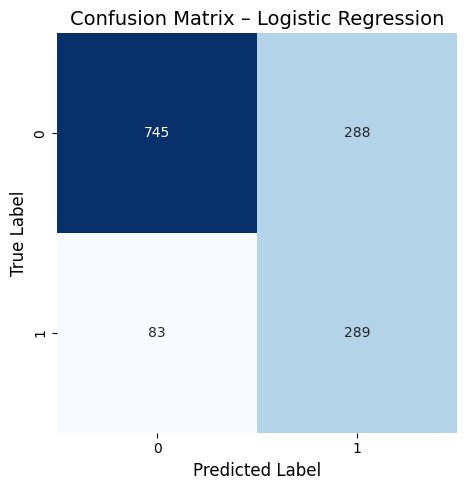

In [132]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap( cm, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)

plt.title("Confusion Matrix – Logistic Regression", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)

plt.tight_layout()

---

---

# 6. Deployment

Triển khai mô hình bằng Streamlit.


Ứng dụng đọc model .pkl, nhận input từ người dùng, tiền xử lý dữ liệu theo pipeline, và trả về xác suất khách hàng rời bỏ (Churn).